Things that happened training these animals:
- Changes on 26th March (lab meeting)
    - Added sucrose to water
    - Changed spouts and tubing link to avoid bubbles
    - Removed anti-bias

- Changes after stopping (from 25th of April)
    - Ports closer together

- Changes on the 5th of May
    - New tasks states so that stimulus appears while holding in the center port

Import libraries

In [1]:
import lecilab_behavior_analysis.utils as utils
import lecilab_behavior_analysis.df_transforms as dft
import lecilab_behavior_analysis.plots as plots
from pathlib import Path
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

Retrieve data from the server

In [2]:
# see the available projects
tv_projects = utils.get_server_projects()
print(tv_projects)

['COT_test_data', 'visual_and_COT_data']


In [3]:
# see the available animals
animals = utils.get_animals_in_project(tv_projects[1])
print(animals)

['ACV001', 'ACV002', 'ACV003', 'ACV004', 'ACV005', 'ACV006', 'ACV007', 'ACV008', 'ACV009', 'ACV010', 'test', 'test2']


In [4]:
# optionally, remove some animals
animals_to_remove = ['test', 'test2']
animals = [animal for animal in animals if animal not in animals_to_remove]
print(animals)

['ACV001', 'ACV002', 'ACV003', 'ACV004', 'ACV005', 'ACV006', 'ACV007', 'ACV008', 'ACV009', 'ACV010']


In [5]:
# retrieve the data for the remaining animals
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    # create the directory if it doesn't exist
    local_path.mkdir(parents=True, exist_ok=True)
    # download the session data
    utils.rsync_session_data(
        project_name=tv_projects[1],
        animal=mouse,
        local_path=str(local_path),
        credentials=utils.get_idibaps_cluster_credentials(),
    )

receiving incremental file list
ACV001.csv

sent 25,129 bytes  received 186,963 bytes  60,597.71 bytes/sec
total size is 18,474,881  speedup is 87.11
receiving incremental file list
ACV002.csv

sent 24,643 bytes  received 104,958 bytes  37,028.86 bytes/sec
total size is 17,324,520  speedup is 133.68
receiving incremental file list
ACV003.csv

sent 26,365 bytes  received 143,734 bytes  48,599.71 bytes/sec
total size is 19,909,759  speedup is 117.05
receiving incremental file list
ACV004.csv

sent 20,767 bytes  received 85,942 bytes  42,683.60 bytes/sec
total size is 12,297,331  speedup is 115.24
receiving incremental file list
ACV005.csv

sent 22,603 bytes  received 132,398 bytes  44,286.00 bytes/sec
total size is 14,863,154  speedup is 95.89
receiving incremental file list
ACV006.csv

sent 26,245 bytes  received 157,475 bytes  73,488.00 bytes/sec
total size is 19,831,785  speedup is 107.95
receiving incremental file list
ACV007.csv

sent 24,097 bytes  received 79,808 bytes  29,687.14 b

Read the data

In [6]:
df_list = []
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")
    df_list.append(df)
    print(f"Loaded data for {mouse}.")
# concatenate the dataframes
df = pd.concat(df_list, ignore_index=True)

/tmp/ipykernel_949622/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV001.


/tmp/ipykernel_949622/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV002.


/tmp/ipykernel_949622/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV003.
Loaded data for ACV004.


/tmp/ipykernel_949622/287582578.py:4: DtypeWarning: Columns (13,14,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV005.


/tmp/ipykernel_949622/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV006.


/tmp/ipykernel_949622/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV007.


/tmp/ipykernel_949622/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV008.


/tmp/ipykernel_949622/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV009.
Loaded data for ACV010.


/tmp/ipykernel_949622/287582578.py:4: DtypeWarning: Columns (13,14,17,18,27,28,29,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


In [7]:
# # create a profile report
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
# # save the report to a file
# output_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("reports") / Path("profiling_report.html")
# output_path.parent.mkdir(parents=True, exist_ok=True)
# profile.to_file(output_file=str(output_path))
# # print the path to the report
# print(f"Profiling report saved to {output_path}.")

Fill missing values and add some columns

In [8]:
df = dft.analyze_df(df)

Occupancy of the box and mouse entries analysis

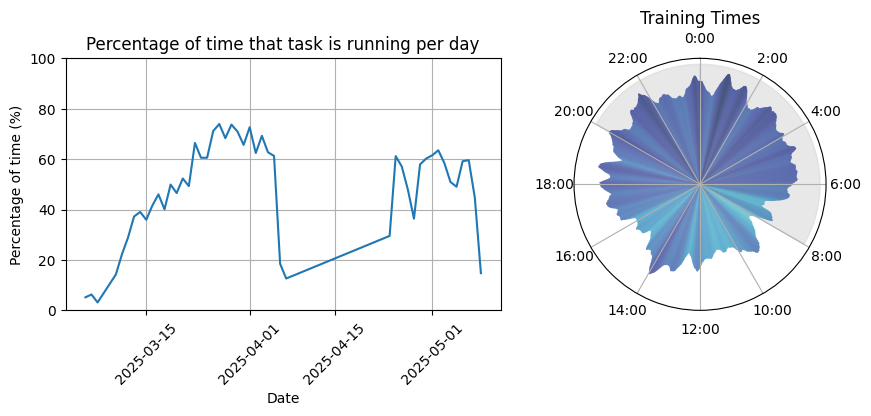

In [9]:
# Plot the percentage of time that the task is running per day and the heatmap of the occupancy during the day
occupancy_df = dft.get_start_and_end_of_sessions_df(df)
daily_percentages = dft.get_daily_occupancy_percentages(occupancy_df)
occupancy_heatmap = dft.get_occupancy_heatmap(occupancy_df, window_size=30)
fig, axs = plt.subplots(1, 2, figsize=(9, 4), gridspec_kw={'width_ratios': [3, 2]})
# plot the percentage of occupancy per day
plots.plot_percentage_of_occupancy_per_day(daily_percentages, ax=axs[0])
# plot the heatmap of occupancy
# transform the second plot to a polar one like this subplot_kw={'projection': 'polar'}
fig.delaxes(axs[1])  # Remove the default second subplot
axs[1] = fig.add_subplot(1, 2, 2, projection='polar')  # Add a polar subplot
plots.plot_training_times_clock_heatmap(occupancy_heatmap, ax=axs[1])
plt.tight_layout()
plt.show()


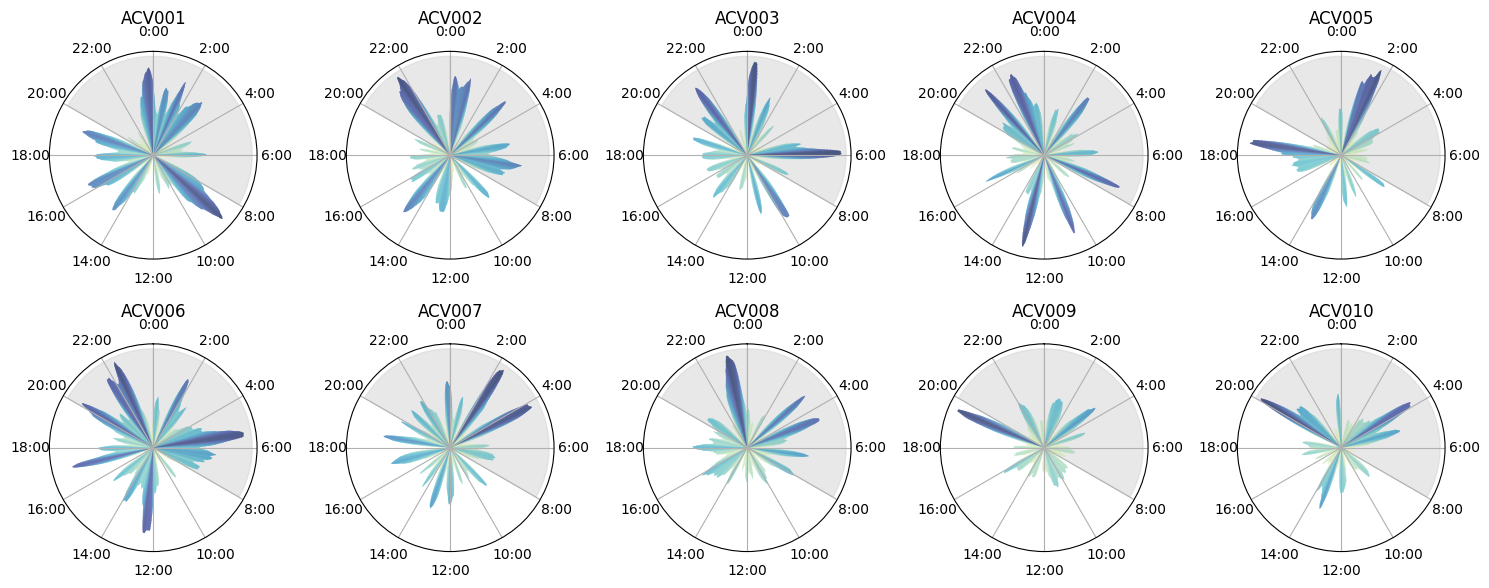

In [10]:
total_subjects = occupancy_df['subject'].nunique()
ncols = 5
nrows = int(np.ceil(total_subjects / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows), subplot_kw={'projection': 'polar'})
for subject, ax in zip(occupancy_df['subject'].unique(), axs.ravel()):
    df_sub = occupancy_df[occupancy_df['subject'] == subject]
    occupancy_heatmap_sub = dft.get_occupancy_heatmap(df_sub)
    plots.plot_training_times_clock_heatmap(occupancy_heatmap_sub, ax=ax)
    ax.set_title(subject, pad=20)
plt.tight_layout()
plt.show()

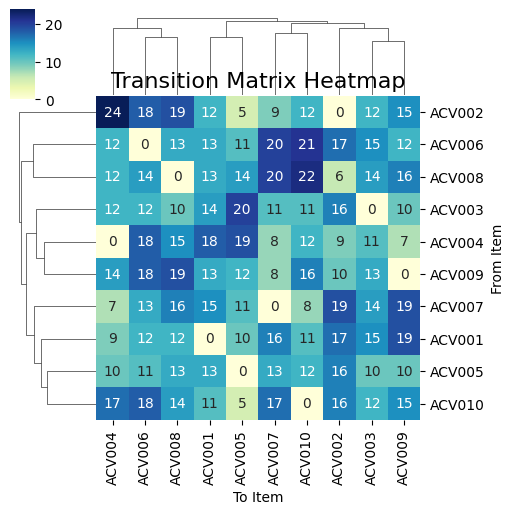

In [11]:
## Analyse the entry orders of the animals
# Sort the dataframe by start_time
sorted_occupancy_df = occupancy_df.sort_values(by='start_time')
# Extract the ordered list of subject names
ordered_subjects = sorted_occupancy_df['subject'].tolist()
# Create the transition matrix
transition_matrix = dft.create_transition_matrix(ordered_subjects)
# Plot the transition matrix
# fig, ax = plt.subplots(figsize=(8, 6))
plots.plot_transition_matrix(transition_matrix)
plt.show()

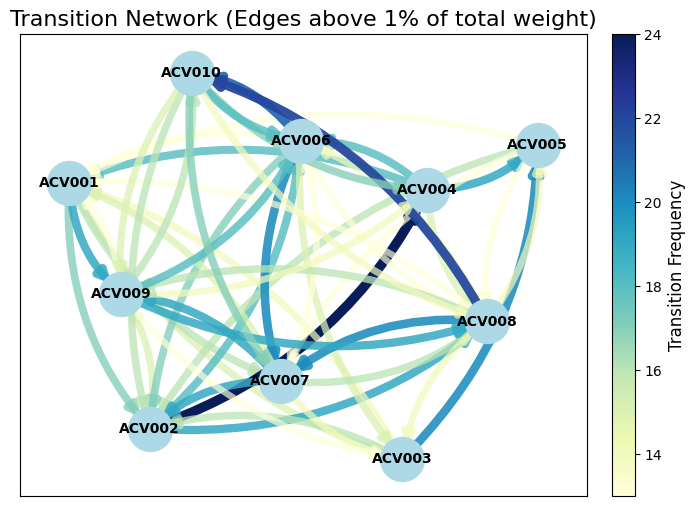

In [12]:
# Plot a network graph
fig = plots.plot_transition_network_with_curved_edges(transition_matrix, threshold=1, figsize=(8, 6))
plt.show()

Trials per day and evolution of performance

In [13]:
# plot the number of trials per day
df_to_plot = df.groupby(['subject', 'year_month_day', 'current_training_stage']).size().reset_index(name='trials')
# add also the correct percentage
df_to_plot_correct = df.groupby(['subject', 'year_month_day', 'current_training_stage'])[['correct', 'miss_trial']].mean().reset_index()
# merge the two dataframes
df_to_plot = df_to_plot.merge(df_to_plot_correct, on=['subject', 'year_month_day', 'current_training_stage'])
# sort the dataframe by date
df_to_plot = df_to_plot.sort_values(by=['year_month_day'])
# replace the current_training_stage values with more readable ones
df_to_plot['current_training_stage'] = df_to_plot['current_training_stage'].replace({
    'not saved': 'Habituation',
})

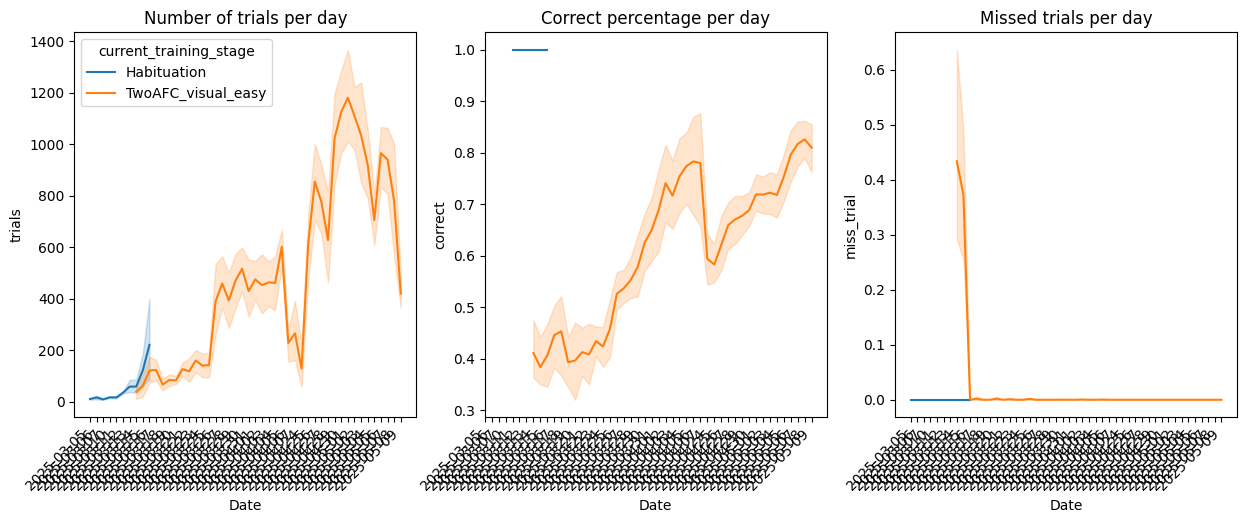

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.ravel()
sns.lineplot(data=df_to_plot, x='year_month_day', y='trials', hue='current_training_stage', ax=axs[0])
axs[0].set_title('Number of trials per day')
sns.lineplot(data=df_to_plot, x='year_month_day', y='correct', hue='current_training_stage', ax=axs[1])
axs[1].set_title('Correct percentage per day')
sns.lineplot(data=df_to_plot, x='year_month_day', y='miss_trial', hue='current_training_stage', ax=axs[2])
axs[2].set_title('Missed trials per day')
for ax in axs:
    ax.set_xlabel('Date')
    # tilt the x-axis labels and align them to the right
    ax.tick_params(axis='x', rotation=45)
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')
# remove legends of 1 and 2
for ax in axs[1:]:
    ax.legend_.remove()


plt.show()

In [15]:
# plot what the animal is doing, if it is alternating or repeating to the left or to the right
# NOTE: This is not the same as the next analysis, as this is what the animal is doing, not what it should do
df = dft.add_port_where_animal_comes_from(df)
# get a metric to see the bias in choices (including alternation)
df['roa_choice_numeric'] = df.apply(utils.get_repeat_or_alternate_to_numeric, axis=1)

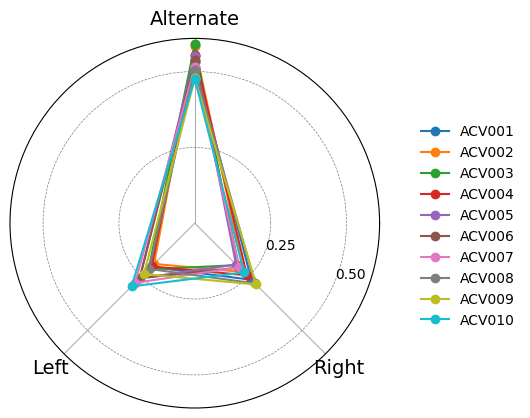

In [16]:
# create a polar plot to see the general bias
df_triangle_polar = dft.get_triangle_polar_plot_df(df)
# plot the polar plot
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax = plots.triangle_polar_plot(df_triangle_polar, ax=ax)
plt.show()

In [121]:
# show the triangles above per animal fluctuating per X number of trials with different hue,
# and illustrating the before and after moving the ports closer
date_of_moving_ports = pd.to_datetime('2025-04-20')
df_before_after = df.copy()
# add a column to indicate if the animal is before or after the moving ports
df_before_after['before_after'] = pd.to_datetime(df_before_after.year_month_day).apply(lambda x: 'before' if x < date_of_moving_ports else 'after')
# recalculate the trial number
df_before_after['total_trial_ba'] = df_before_after.groupby(['subject', 'before_after']).cumcount() + 1
trial_group_size = 200
df_before_after['trial_group'] = df_before_after['total_trial'] // trial_group_size * trial_group_size
groupby = ["trial_group", "before_after"]
df_bias_evolution = dft.get_bias_evolution_df(df_before_after, groupby=groupby)

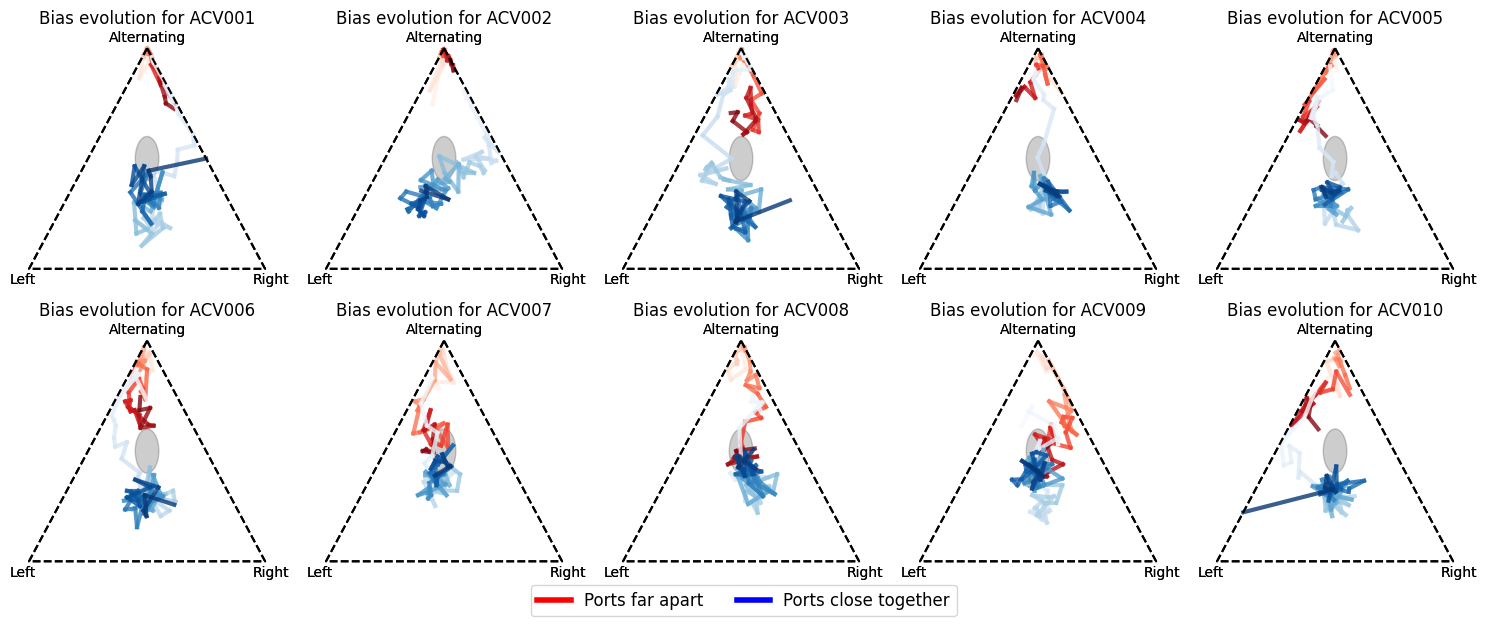

In [122]:
# plot the bias trajectories
total_subjects = df_bias_evolution['subject'].nunique()
ncols = 5
nrows = int(np.ceil(total_subjects / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows), sharey=True)
for subject, ax in zip(df_bias_evolution['subject'].unique(), axs.ravel()):
    df_sub = df_bias_evolution[df_bias_evolution['subject'] == subject]
    for bef_or_after in df_sub['before_after'].unique():
        df_sub_ba = df_sub[df_sub['before_after'] == bef_or_after]
        df_sub_ba = dft.points_to_lines_for_bias_evolution(df_sub_ba, groupby="trial_group")
        # define a palette depending if it is before or after
        if bef_or_after == 'before':
            palette = sns.color_palette("Reds", n_colors=len(df_sub_ba['trial_group'].unique()))
        else:
            palette = sns.color_palette("Blues", n_colors=len(df_sub_ba['trial_group'].unique()))
        ax = plots.plot_decision_evolution_triangle(df_sub_ba, ax=ax, hue="trial_group", palette=palette)
    ax.set_title(f'Bias evolution for {subject}', pad=10, fontsize=12)
# create a legend for the before and after at the bottom of the figure
handles = [plt.Line2D([0], [0], color='red', lw=4, label='Ports far apart'),
           plt.Line2D([0], [0], color='blue', lw=4, label='Ports close together')]
fig.legend(handles=handles, loc='lower center', ncol=2, fontsize=12, bbox_to_anchor=(0.5, -0.05))
plt.tight_layout()
plt.show()

Analysis of the 2AFC task

In [123]:
# Correct percentage per total trial in 2AFC. Separate also alternating and repeating
df2afc = df_before_after[df_before_after['current_training_stage'] == 'TwoAFC_visual_easy']
# First, get a column that indicates what the animal should do
df_subject_list = []
for mouse in animals:
    df_mouse = df2afc[df2afc['subject'] == mouse]
    df_session_list = []
    for session in df_mouse['session'].unique():
        df_session = df_mouse[df_mouse['session'] == session].copy()
        df_session["repeat_or_alternate"] = dft.get_repeat_or_alternate_series(df_session.correct_side)
        df_session_list.append(df_session)
    # calculate the performances
    df_mouse = pd.concat(df_session_list, ignore_index=True)
    df_mouse = dft.get_repeat_or_alternate_performance(df_mouse, window=25)
    df_mouse = dft.get_performance_through_trials(df_mouse, window=25)
    df_subject_list.append(df_mouse)

df2afc = pd.concat(df_subject_list, ignore_index=True)

In [124]:
# Plot the performance through trials
# Bin the total trials every 100 trials
df2afc['total_trial_bin'] = df2afc['total_trial'] // 100 * 100
# Group by the binned total trials and calculate the mean performance
df_perf_binned = df2afc.groupby(['subject', 'total_trial_bin', 'repeat_or_alternate']).agg({'correct': 'mean'}).reset_index()

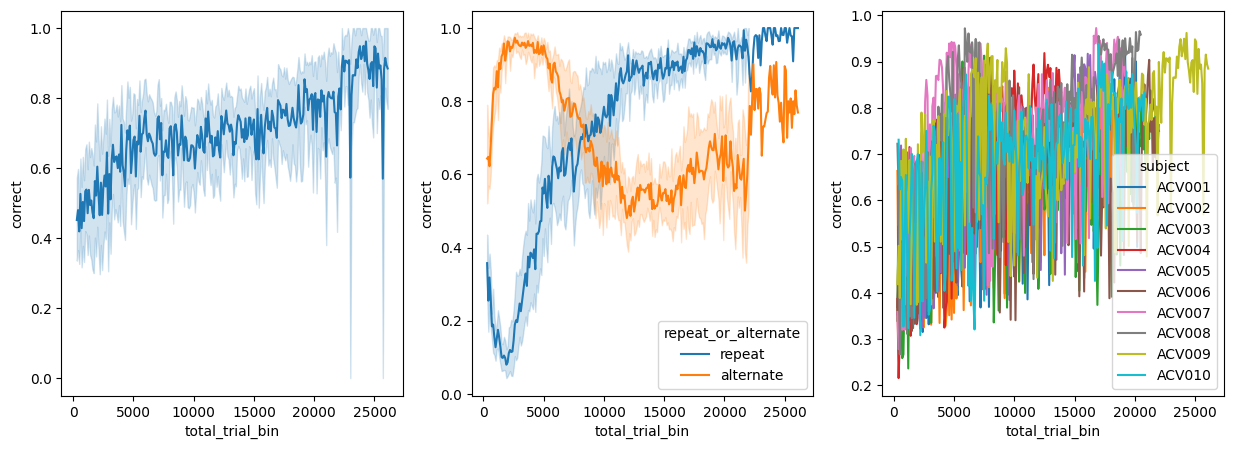

In [125]:
# plot the performance through trials
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))
# plot the performance through trials
sns.lineplot(data=df_perf_binned, x='total_trial_bin', y='correct', ax=axs[0])
sns.lineplot(data=df_perf_binned, x='total_trial_bin', y='correct', hue='repeat_or_alternate', hue_order=['repeat', 'alternate'], ax=axs[1])
sns.lineplot(data=df_perf_binned, x='total_trial_bin', y='correct', hue='subject', ax=axs[2], errorbar=None)
plt.show()

In [126]:
#TODO: calculate reaction times per animal in 2AFC and show overlapping distributions
#TODO: show evolution of the reaction times per day, and the iti
#TODO: do this analysis for the postdoc data and compare

Look into behavior more closely

In [127]:
# select only one mouse for now
df2afc_sel = df2afc[df2afc['subject'] == 'ACV003']

In [59]:
# # select those sessions with performance above 0.65
# sessions_to_keep = df2afc_sel.groupby('session')['correct'].mean().reset_index()
# sessions_to_keep = sessions_to_keep[sessions_to_keep['correct'] > 0.55]['session'].unique()
# # filter the dataframe to keep only those sessions
# df2afc_sel = df2afc_sel[df2afc_sel['session'].isin(sessions_to_keep)]

In [128]:
# alternatively, group trials in chunks of 500 trials
trial_group_size = 500
df2afc_sel = df2afc_sel.copy() # avoids a stupid warning
df2afc_sel['trial_group'] = df2afc_sel['total_trial'] // trial_group_size * trial_group_size

In [129]:
df2afc_sel = dft.add_visual_stimulus_difference(df2afc_sel)

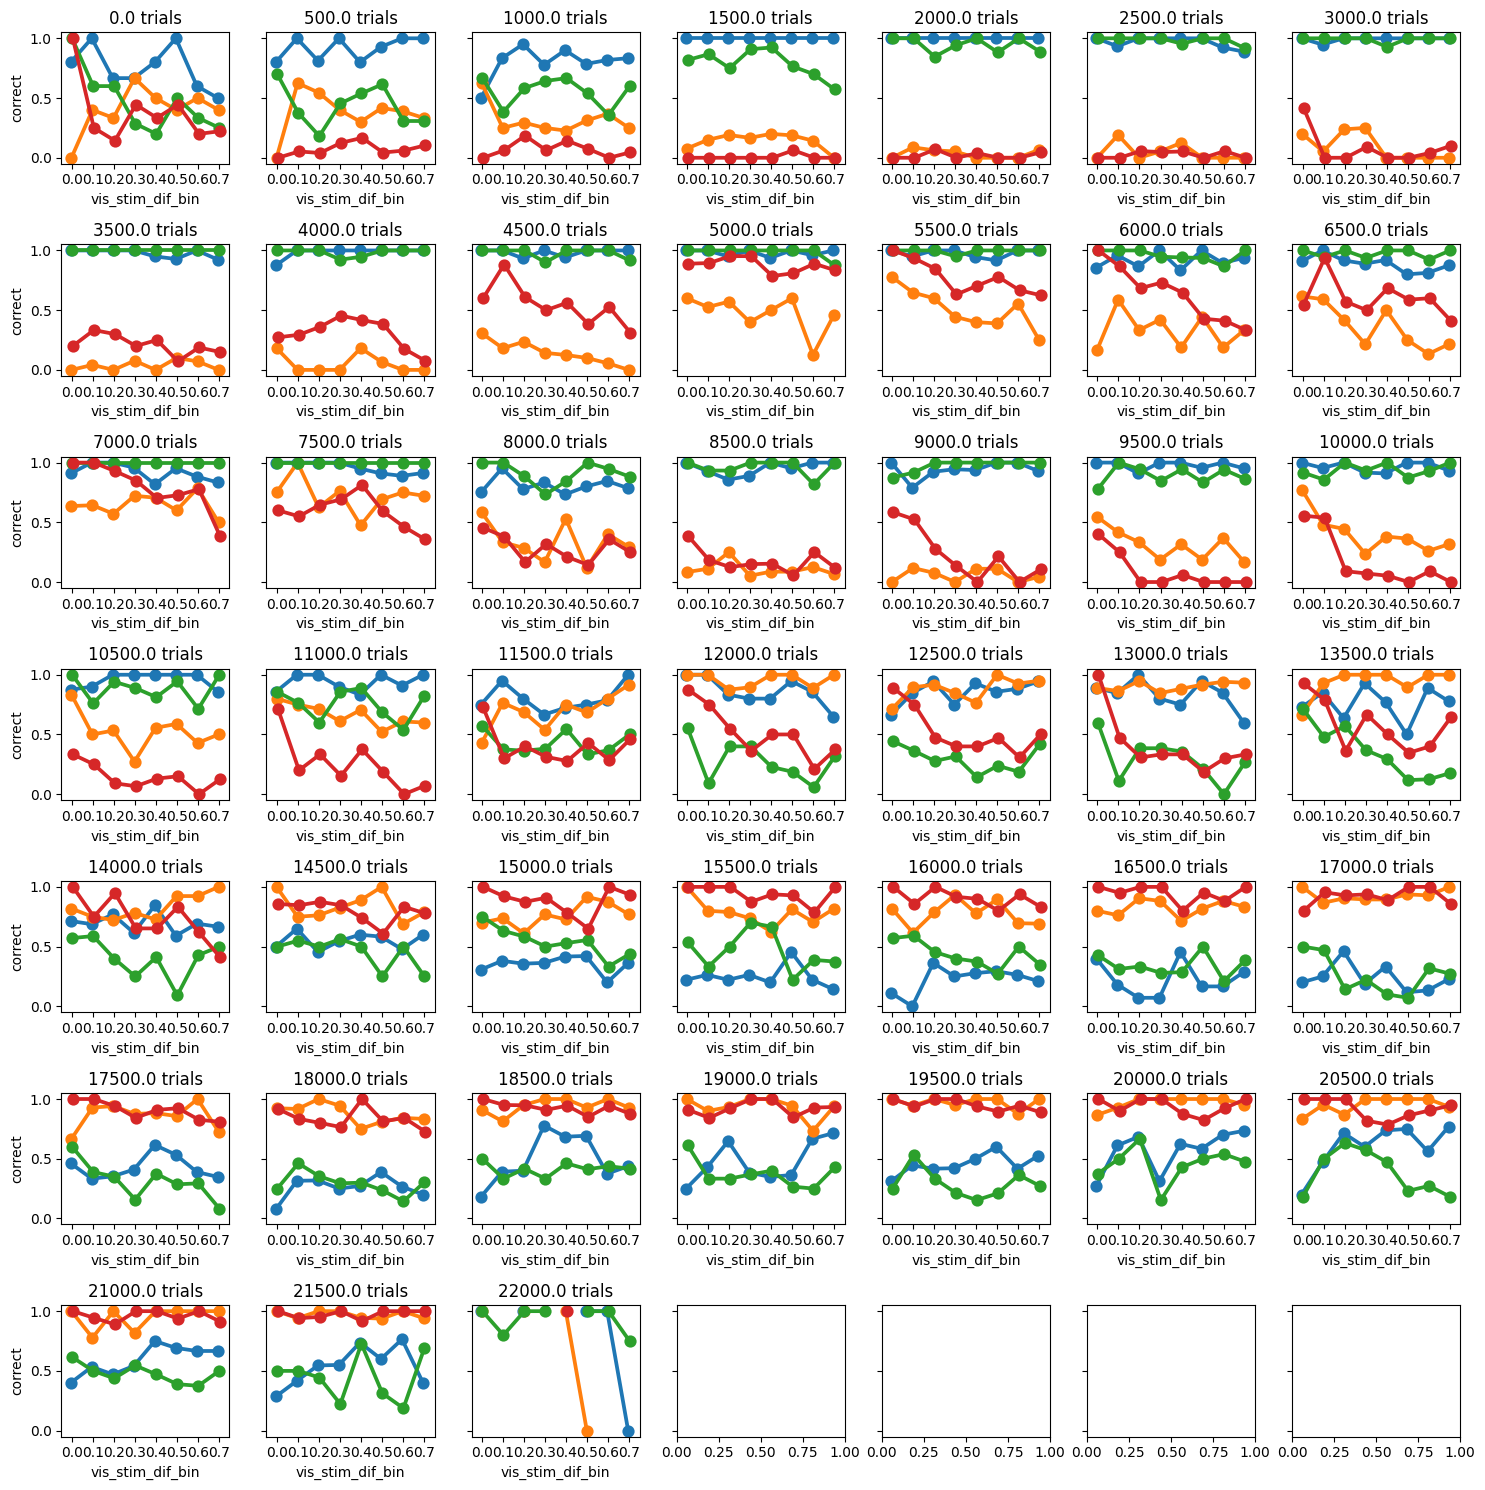

In [130]:
# TODO: compare this with the condition of where the animal comes from

# check the evolution of each of these "decisions" during training
# group by the binned data and calculate the mean performance
df2afc_binned = df2afc_sel.groupby(['vis_stim_dif_bin', 'correct_side', 'repeat_or_alternate', 'trial_group'])[['correct']].mean().reset_index()
# get the different combinations of correct side and repeat or alternate
df2afc_binned['correct_side_repeat_or_alternate'] = df2afc_binned['correct_side'] + '_' + df2afc_binned['repeat_or_alternate']
# get only the 4 combinations and remove nans etc
df2afc_binned = df2afc_binned[df2afc_binned['correct_side_repeat_or_alternate'].isin(['left_repeat', 'left_alternate', 'right_repeat', 'right_alternate'])]


# plot the binned data with the new combination for each day
ncols = 7
nrows = pd.unique(df2afc_binned['trial_group']).size // ncols + 1
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 15), sharey=True)
axs = axs.ravel()
# plot the binned data for each trial group
for (trial_group, group), ax in zip(df2afc_binned.groupby('trial_group'), axs):
    try:
        sns.pointplot(data=group, x='vis_stim_dif_bin', y='correct', hue='correct_side_repeat_or_alternate', dodge=True, errorbar=None, ax=ax, legend=False)
    except ZeroDivisionError:
        # If there's a ValueError, it might be due to not enough data points for the hue
        # In this case, we can skip plotting for this group
        # print(f"Skipping {day} due to insufficient data for plotting.")
        continue
    ax.set_title(f'{trial_group} trials', fontsize=12)
plt.tight_layout()
plt.show()

this shows that when they are learning and they struggle with a decision kind, they use the overall intensity of the port to take that decision. But it is not a general side bias, as it does not affect the alternation behavior

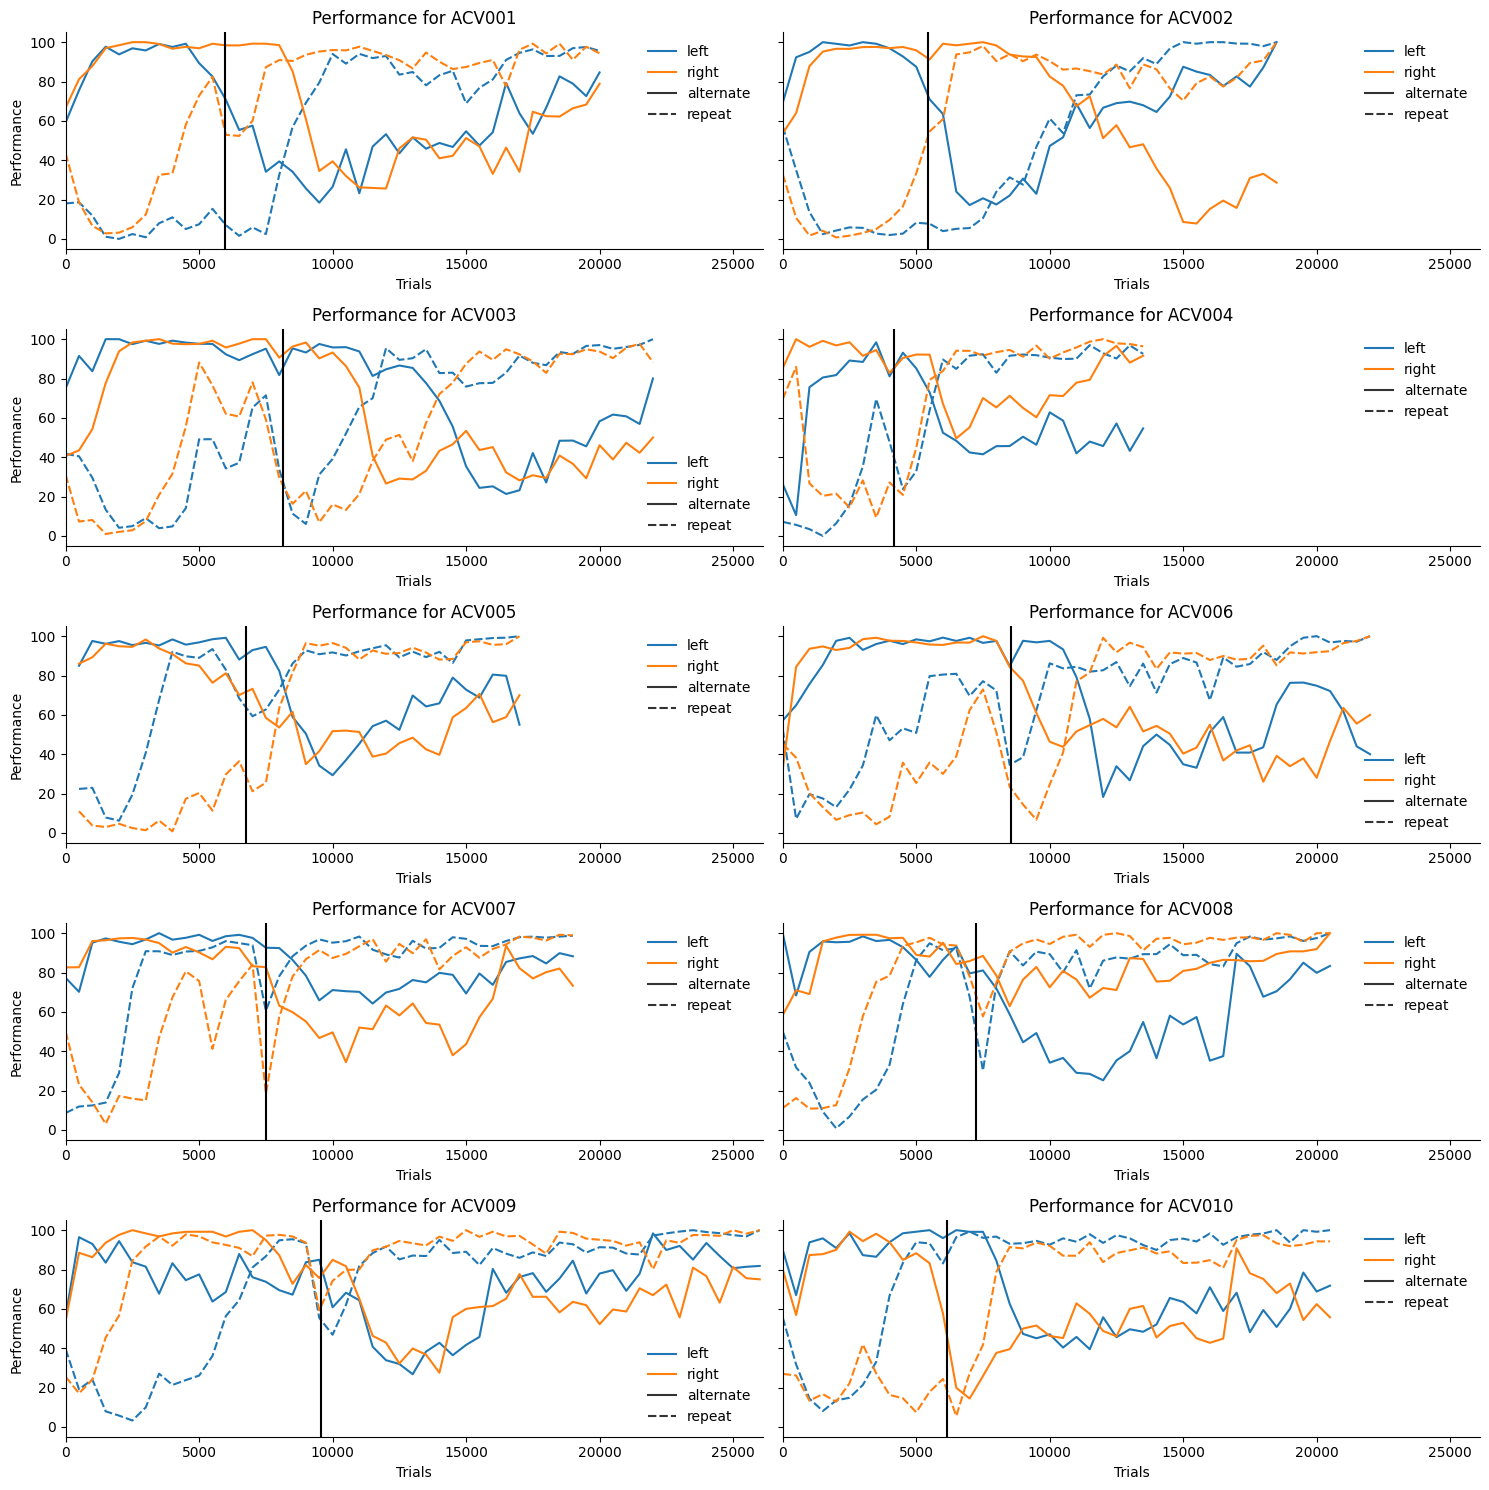

In [134]:
# show this analysis for all the mice
total_subjects = df2afc['subject'].nunique()
ncols = 2
nrows = int(np.ceil(total_subjects / ncols))
# find the max trials that a subject has done
max_trials = df2afc['total_trial'].max()
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 3 * nrows), sharey=True)
for subject, ax in zip(df2afc['subject'].unique(), axs.ravel()):
    # filter the dataframe to keep only the current subject
    df_subject = df2afc[df2afc['subject'] == subject]
        # group by the binned data and calculate the mean performance
    df_pbd = dft.get_performance_by_decision_df(df_subject)
    # plot the data
    plots.performance_by_decision_plot(df_pbd, ax=ax)
    ax.set_title(f'Performance for {subject}')
    ax.set_xlim(0, max_trials)
    # plot a vertical line between before and after the moving ports
    # generate a vector that shows when df_subject.before_after changes
    ch_vec = df_subject['before_after'].ne(df_subject['before_after'].shift()).astype(int)
    ch_vec.iloc[0] = 0
    # get the indices of the changes
    ch_indices = np.where(ch_vec == 1)[0][0]
    # plot a vertical line at the first change
    ax.axvline(x=df_subject['total_trial'].iloc[ch_indices], color='black', linestyle='-')

plt.tight_layout()
plt.show()

each mouse has a prefered side, but they all have to counteract the "alternation" strategy, although they do this without affecting the performance on the alternation. Moving the ports closer changes the overall strategy but animals keep a preferred side

In [29]:

import altair as alt
import pandas as pd

# Sample data (replace with your actual dataset)
data = df_to_plot.copy()
# convert nans to 1
data['correct'] = data['correct'].fillna(1) * 100

/tmp/ipykernel_949622/4255951163.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['correct'] = data['correct'].fillna(1) * 100


In [30]:
import altair as alt
import pandas as pd
import numpy as np

# Convert date to datetime format
data['year_month_day'] = pd.to_datetime(data['year_month_day'])

# Get min and max dates
min_date = data['year_month_day'].min()
max_date = data['year_month_day'].max()

# Create a list of all dates in the range
date_range = pd.date_range(start=min_date, end=max_date)
date_strings = [d.strftime('%Y-%m-%d') for d in date_range]

# Add a numeric field for the slider
data['date_index'] = data['year_month_day'].apply(
    lambda x: np.where(date_range == x)[0][0]
)

# Find global min and max values for x and y axes
min_trials = data['trials'].min()
max_trials = data['trials'].max()
min_correct = data['correct'].min()
max_correct = data['correct'].max()

# Add some padding to the axis limits (10%)
trials_padding = (max_trials - min_trials) * 0.1
correct_padding = (max_correct - min_correct) * 0.1

# Create a slider for date selection
date_slider = alt.binding_range(
    min=0,
    max=len(date_range)-1,
    step=1,
    name='Date: '
)

# Create a parameter that updates with the slider
date_selection = alt.param(
    name='date_idx',
    value=0,
    bind=date_slider
)

# Create a derived field for display purposes
slider_date = alt.expr.time(date_range[0].timestamp()*1000) + alt.expr.milliseconds(86400000 * date_selection)

# Hover selection for subjects
hover_selection = alt.selection_point(
    name='hover',
    on='mouseover', 
    fields=['subject'],
    empty=False
)

# Base chart encoding
base_encoding = dict(
    x=alt.X('trials:Q', 
            title='Number of Trials',
            scale=alt.Scale(domain=[min_trials - trials_padding, max_trials + trials_padding])),
    y=alt.Y('correct:Q', 
            title='Correct Choices (%)', 
            scale=alt.Scale(domain=[0, 100])),
    color=alt.Color('current_training_stage:N', 
                    title='Training Stage',
                    legend=alt.Legend(orient='bottom', 
                                      titleFontSize=12, 
                                      labelFontSize=10))
)

# Main points filtered by current date
points = alt.Chart(data).mark_circle().encode(
    **base_encoding,
    size=alt.Size('trials:Q', title='Trials', scale=alt.Scale(range=[10, 200])),
    opacity=alt.condition(hover_selection, alt.value(1), alt.value(0.5)),
    tooltip=['subject', 'trials', 'correct', 'current_training_stage', 
             alt.Tooltip('year_month_day:T', title='Date')]
).transform_filter(
    alt.datum.date_index == date_selection
).add_params(hover_selection)

# Trajectories that appear on hover
trajectories = alt.Chart(data).mark_line(
    opacity=0.7,
    strokeWidth=2
).encode(
    **base_encoding,
    detail='subject:N',
    opacity=alt.condition(hover_selection, alt.value(0.8), alt.value(0))
).transform_filter(
    hover_selection
)

# All points for the selected subject (trajectory points)
trajectory_points = alt.Chart(data).mark_circle(
    size=80
).encode(
    **base_encoding,
    opacity=alt.condition(hover_selection, alt.value(0.8), alt.value(0)),
    tooltip=['subject', 'trials', 'correct', 'current_training_stage', 
             alt.Tooltip('year_month_day:T', title='Date')]
).transform_filter(
    hover_selection
)

# Date labels for trajectory points
date_labels = alt.Chart(data).mark_text(
    align='left',
    baseline='middle',
    dx=10,
    fontSize=10
).encode(
    **base_encoding,
    text='year_month_day:T',
    opacity=alt.condition(hover_selection, alt.value(1), alt.value(0))
).transform_filter(
    hover_selection
)

# Subject labels that appear on hover
subject_labels = alt.Chart(data).mark_text(
    align='center',
    baseline='bottom',
    dy=-10,
    fontSize=14,
    fontWeight='bold'
).encode(
    **base_encoding,
    text='subject:N',
    opacity=alt.condition(hover_selection, alt.value(1), alt.value(0))
).transform_filter(
    alt.datum.date_index == date_selection
).transform_filter(
    hover_selection
)

# Current date display
date_display = alt.Chart({'values': [{}]}).mark_text(
    align='right',
    baseline='top',
    fontSize=14,
    font='Arial',
    fontWeight='bold',
    dx=-10,
    dy=10
).encode(
    text=alt.Text(
        'yearmonthdate(datum.date):T',
        title='Current Date'
    ),
    x=alt.value(600),  # Right side of the chart
    y=alt.value(0)     # Top of the chart
).transform_calculate(
    date=slider_date
)

# Combine all layers
chart = alt.layer(
    points, 
    trajectories, 
    trajectory_points, 
    date_labels, 
    subject_labels, 
    date_display
).properties(
    width=600, 
    height=400,
    title='Subject Performance by Date'
).add_params(date_selection)

chart

alt.LayerChart(...)

In [31]:
data['year_month_day']

0     2025-03-05
232   2025-03-05
189   2025-03-05
142   2025-03-05
48    2025-03-05
         ...    
141   2025-05-09
95    2025-05-09
47    2025-05-09
370   2025-05-09
462   2025-05-09
Name: year_month_day, Length: 463, dtype: datetime64[ns]

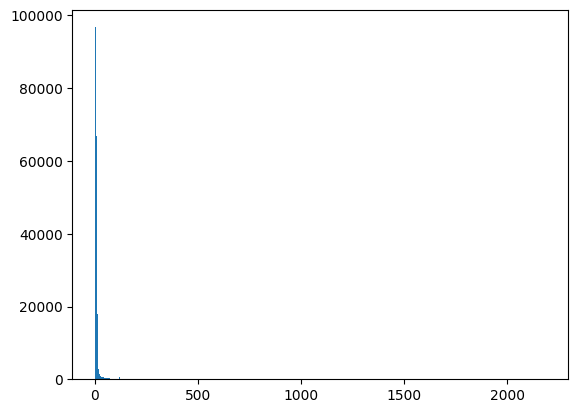

In [32]:
plt.hist(df.TRIAL_END - df.TRIAL_START, bins=500)
plt.show()

In [33]:
df.columns

Index(['session', 'date', 'trial', 'subject', 'task', 'system_name',
       'run_mode', 'Port1In', 'Port1Out', 'Port2In', 'Port2Out', 'Port3In',
       'Port3Out', 'STATE_auto_reward_state_left_END',
       'STATE_auto_reward_state_left_START', 'STATE_hold_center_port_END',
       'STATE_hold_center_port_START', 'STATE_hold_while_stimulus_END',
       'STATE_hold_while_stimulus_START', 'STATE_iti_END', 'STATE_iti_START',
       'STATE_punish_state_END', 'STATE_punish_state_START',
       'STATE_ready_to_initiate_END', 'STATE_ready_to_initiate_START',
       'STATE_reward_state_END', 'STATE_reward_state_START',
       'STATE_reward_state_left_END', 'STATE_reward_state_left_START',
       'STATE_reward_state_right_END', 'STATE_reward_state_right_START',
       'STATE_start_of_trial_END', 'STATE_start_of_trial_START',
       'STATE_stimulus_state_END', 'STATE_stimulus_state_START', 'TRIAL_END',
       'TRIAL_START', 'Tup', 'auditory_stimulus', 'correct', 'correct_side',
       'current_tr